In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
school_districts = gpd.read_file('../data/school_districts.geojson')
print(school_districts.crs)
school_districts

EPSG:4326


first_name       city    zip                           email state  \
0  Dr. Sharon  Nashville  37218  gentryfordistrict1@comcast.net    TN   
1        Jill    Madison  37115          jill.speering@mnps.org    TN   
2  Dr. Jo Ann  Nashville  37220          joann.brannon@mnps.org    TN   
3        Anna  Hermitage  37076          anna.shepherd@mnps.org    TN   
4         Amy  Nashville  37221             amy.frogge@mnps.org    TN   
5        Mary  Nashville  37215       mary@pierceforschools.org    TN   
6   Christine  Nashville  37203                 cbuggs@mnps.org    TN   
7       Tyese    Antioch  37013           tyese.hunter@mnps.org    TN   
8        Will  Nashville  37204     will@pinkstonforschools.com    TN   

  last_name                address    position term_expir district  \
0    Gentry        6108 Beals Lane      Member       2016        1   
1  Speering      1033 Falls Avenue  Vice-Chair       2016        3   
2   Brannon  5444 San Marcos Drive      Member       2018        2   
3  Shepherd     4545 Raccoon Trail       Chair       2018        4   
4    Frogge  7237 Riverfront Drive      Member       2016        9   
5    Pierce      4329 Wallace Lane      Member       2018        8   
6     Buggs        425 Fisk Street      Member       2016        5   
7    Hunter   2433 Evanfield Court      Member       2018        6   
8  Pinkston  937 Battlefield Drive      Member       2016        7   

          phone                                           geometry  
0  615-268-5269  MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ...  
1  615-562-5234  MULTIPOLYGON (((-86.75365 36.40428, -86.75353 ...  
2  615-833-5976  MULTIPOLYGON (((-86.76696 36.08333, -86.7659 3...  
3  615-210-3768  MULTIPOLYGON (((-86.58098 36.20935, -86.58099 ...  
4  615-521-5650  MULTIPOLYGON (((-86.97287 36.20828, -86.97045 ...  
5  615-310-9772  MULTIPOLYGON (((-86.80849 36.14744, -86.80863 ...  
6  615-525-5371  MULTIPOLYGON (((-86.69728 36.20414, -86.69696 ...  
7  615-739-8068  MULTIPOLYGON (((-86.70559 36.09685, -86.70306 ...  
8  615-298-5787  MULTIPOLYGON (((-86.55811 36.13984, -86.55812 ...

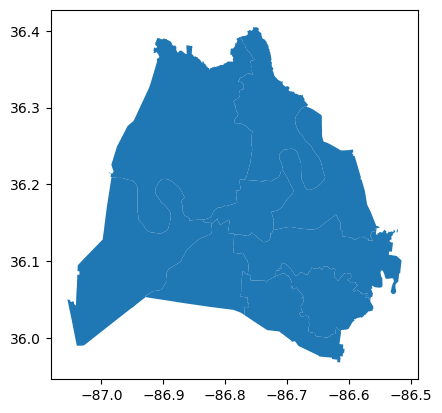

In [3]:
school_districts.plot();

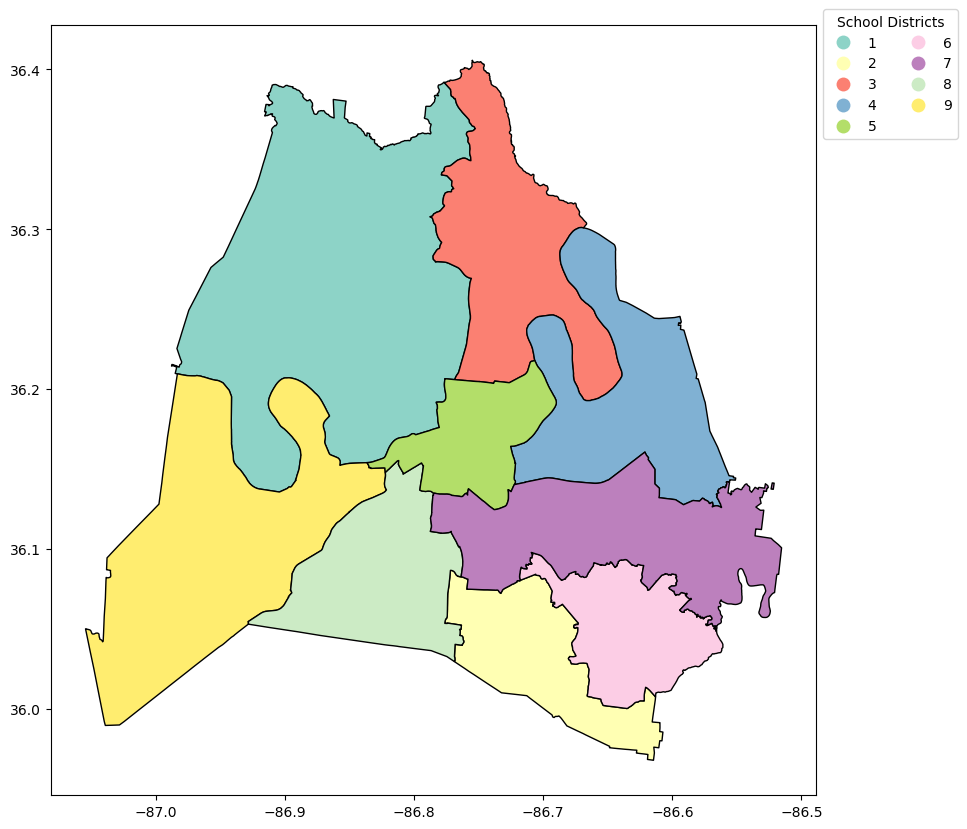

In [4]:
leg_kwds = {'title': 'School Districts', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

school_districts.plot(column = 'district', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set3')

plt.show()

In [5]:
bus_stops = pd.read_csv('../data/busstops_cleaned.csv')
print(bus_stops.shape)
bus_stops

(2524, 5)


stop                     route  \
0           GREEN LN & WHITES CREEK PIKE WB             GOLDEN VALLEY   
1             _ 9TH AVE S & EDGEHILL AVE SB          8TH AVENUE SOUTH   
2            DONELSON/DELL STATION OUTBOUND         MURFREESBORO PIKE   
3                17TH AVE S & DOROTHY PL SB                   BELMONT   
4                  COCKRILL ST & 14TH AVE N  ST. CECILIA - CUMBERLAND   
...                                     ...                       ...   
2519      RICHARD JONES RD & LONE OAK RD EB                   BELMONT   
2520  WOODMONT BLVD & PLEASANT VALLEY RD WB         12TH AVENUE SOUTH   
2521            BUCHANAN ST & 11TH AVE N EB                  BORDEAUX   
2522               MARINA ST & MYRTLE ST EB                  McFERRIN   
2523            LAFAYETTE ST & 1ST AVE S WB         MURFREESBORO PIKE   

                     location        lat        lng  
0     (36.236249, -86.816722)  36.236249 -86.816722  
1     (36.142642, -86.780897)  36.142642 -86.780897  
2     (36.105615, -86.672004)  36.105615 -86.672004  
3     (36.137623, -86.795609)  36.137623 -86.795609  
4     (36.175944, -86.804242)  36.175944 -86.804242  
...                       ...        ...        ...  
2519  (36.104296, -86.809189)  36.104296 -86.809189  
2520  (36.110228, -86.775619)  36.110228 -86.775619  
2521  (36.180257, -86.804974)  36.180257 -86.804974  
2522  (36.180416, -86.757368)  36.180416 -86.757368  
2523  (36.150003, -86.765572)  36.150003 -86.765572  

[2524 rows x 5 columns]

In [6]:
bus_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stop      2524 non-null   object 
 1   route     2524 non-null   object 
 2   location  2524 non-null   object 
 3   lat       2524 non-null   float64
 4   lng       2524 non-null   float64
dtypes: float64(2), object(3)
memory usage: 98.7+ KB


In [7]:
school_districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
bus_geo = gpd.GeoDataFrame(bus_stops, 
                           crs = school_districts.crs, 
                           geometry = gpd.points_from_xy(bus_stops.lng, bus_stops.lat))

In [9]:
type(bus_geo)

geopandas.geodataframe.GeoDataFrame

In [10]:
school_districts = school_districts[['zip', 'district', 'geometry']]
stops_by_district = gpd.sjoin(bus_geo, school_districts, predicate = 'within')
stops_by_district.head()

stop                     route  \
0  GREEN LN & WHITES CREEK PIKE WB             GOLDEN VALLEY   
1    _ 9TH AVE S & EDGEHILL AVE SB          8TH AVENUE SOUTH   
2   DONELSON/DELL STATION OUTBOUND         MURFREESBORO PIKE   
3       17TH AVE S & DOROTHY PL SB                   BELMONT   
4         COCKRILL ST & 14TH AVE N  ST. CECILIA - CUMBERLAND   

                  location        lat        lng                    geometry  \
0  (36.236249, -86.816722)  36.236249 -86.816722  POINT (-86.81672 36.23625)   
1  (36.142642, -86.780897)  36.142642 -86.780897   POINT (-86.7809 36.14264)   
2  (36.105615, -86.672004)  36.105615 -86.672004    POINT (-86.672 36.10562)   
3  (36.137623, -86.795609)  36.137623 -86.795609  POINT (-86.79561 36.13762)   
4  (36.175944, -86.804242)  36.175944 -86.804242  POINT (-86.80424 36.17594)   

   index_right    zip district  
0            0  37218        1  
1            6  37203        5  
2            8  37204        7  
3            5  37215        8  
4            0  37218        1

In [11]:
stops_by_district = stops_by_district.drop(columns = 'index_right')

In [12]:
stops_by_district['district'].value_counts()

district
5    801
1    424
8    238
7    237
3    201
4    198
9    147
6    129
2    110
Name: count, dtype: int64

In [13]:
stops_by_district['route'].value_counts()

route
LEBANON PIKE                        133
SHELBY                              123
MURFREESBORO PIKE                   117
GALLATIN PIKE                       116
DICKERSON ROAD                      106
BORDEAUX                            103
ANTIOCH EXPRESS                      98
CHARLOTTE                            92
WEST END - WHITE BRIDGE              90
NOLENSVILLE PK BRT LITE              86
SCOTT                                85
HERMAN                               82
UNIVERSITY CONNECTOR                 79
WHITES CREEK                         79
BELMONT                              76
MIDTOWN                              74
12TH AVENUE SOUTH                    67
AIRPORT - DOWNTOWN HOTELS            60
WEST END - BELLEVUE                  59
THOMPSON CONNECTOR                   58
McFERRIN                             55
100 OAKS                             53
HILLSBORO                            53
OLD HICKORY                          51
GRASSMERE-EDMONDSON CONNECTOR     

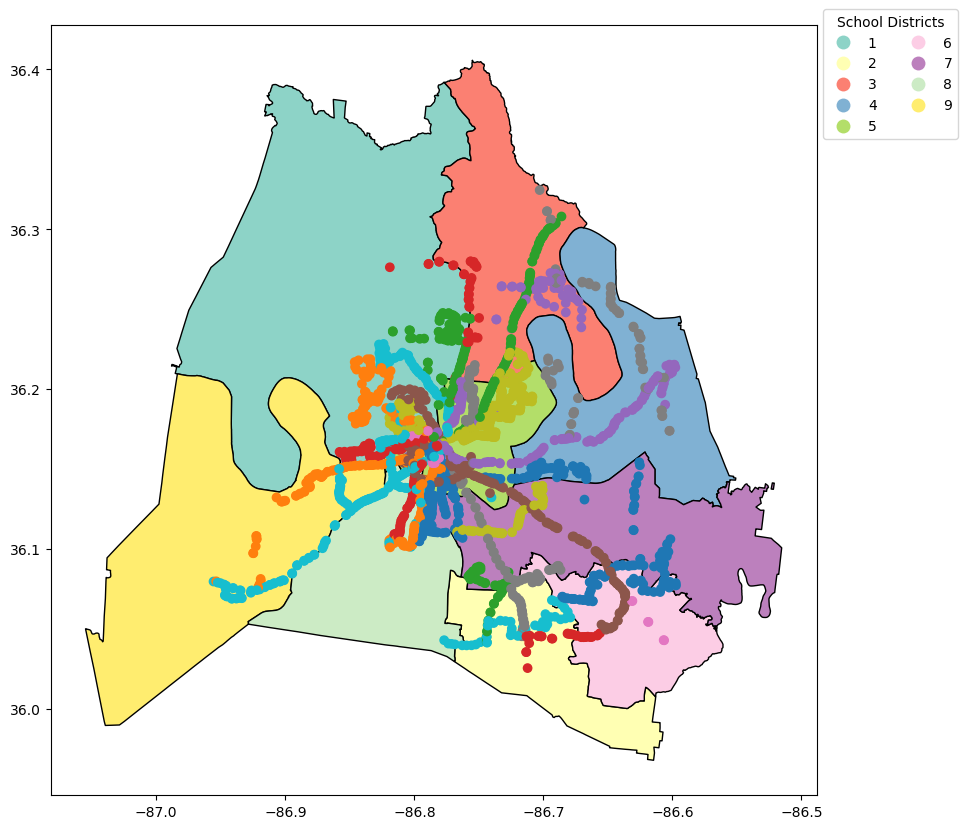

In [14]:
leg_kwds = {'title': 'School Districts', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

ax = school_districts.plot(column = 'district', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set3')

stops_by_district.plot( ax = ax, column = 'route');
plt.show();

In [15]:
school_districts.geometry.centroid

C:\Users\user\AppData\Local\Temp\ipykernel_8004\2191239499.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  school_districts.geometry.centroid


0    POINT (-86.86087 36.26282)
1    POINT (-86.72361 36.28516)
2    POINT (-86.70156 36.03021)
3    POINT (-86.63964 36.19697)
4    POINT (-86.95428 36.10392)
5    POINT (-86.82739 36.08342)
6    POINT (-86.75215 36.16995)
7    POINT (-86.63366 36.04946)
8     POINT (-86.64296 36.1081)
dtype: geometry

In [16]:
area_center = [stops_by_district['lat'].mean(), stops_by_district['lng'].mean()]

In [17]:
map_districts = folium.Map(location = area_center, zoom_start = 12)
map_districts

In [18]:
i = 0
for row_index, row_values in stops_by_district.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 0
values are:
 
stop        GREEN LN & WHITES CREEK PIKE WB
route                         GOLDEN VALLEY
location            (36.236249, -86.816722)
lat                               36.236249
lng                              -86.816722
geometry       POINT (-86.816722 36.236249)
zip                                   37218
district                                  1
Name: 0, dtype: object
------------------------- 
index is 1
values are:
 
stop        _ 9TH AVE S & EDGEHILL AVE SB
route                    8TH AVENUE SOUTH
location          (36.142642, -86.780897)
lat                             36.142642
lng                            -86.780897
geometry     POINT (-86.780897 36.142642)
zip                                 37203
district                                5
Name: 1, dtype: object
------------------------- 
index is 2
values are:
 
stop        DONELSON/DELL STATION OUTBOUND
route                    MURFREESBORO PIKE
location           (36.105615, -86.672004)
lat     

In [40]:
stop_count = stops_by_district['district'].value_counts().to_frame().sort_values('district')

In [49]:
district_1 = stop_count['count'].iloc[0]
district_2 = stop_count['count'].iloc[1]
district_3 = stop_count['count'].iloc[2]
district_4 = stop_count['count'].iloc[3]
district_5 = stop_count['count'].iloc[4]
district_6 = stop_count['count'].iloc[5]
district_7 = stop_count['count'].iloc[6]
district_8 = stop_count['count'].iloc[7]
district_9 = stop_count['count'].iloc[8]

In [86]:


# Define the legend's HTML
title_and_legend = f"""
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 150px; height: 210px; 
     border:2px solid grey; z-index:9999; font-size:14px; font-family: Trebuchet MS;
     background-color:white; opacity: 0.85;">
     <center>
     <b>Bus Stop Count</b><br>
     District 1 &nbsp; <i class="fa fa-square" style="color:red"></i>&nbsp; {district_1}<br>
     District 2 &nbsp; <i class="fa fa-square" style="color:orange"></i>&nbsp; {district_2}<br>
     District 3 &nbsp; <i class="fa fa-square" style="color:yellow"></i>&nbsp; {district_3}<br>
     District 4 &nbsp; <i class="fa fa-square" style="color:lime"></i>&nbsp; {district_4}<br>
     District 5 &nbsp; <i class="fa fa-square" style="color:green"></i>&nbsp; {district_5}<br>
     District 6 &nbsp; <i class="fa fa-square" style="color:turquoise"></i>&nbsp; {district_6}<br>
     District 7 &nbsp; <i class="fa fa-square" style="color:blue"></i>&nbsp; {district_7}<br>
     District 8 &nbsp; <i class="fa fa-square" style="color:indigo"></i>&nbsp; {district_8}<br>
     District 9 &nbsp; <i class="fa fa-square" style="color:violet"></i>&nbsp; {district_9}<br>
     </center>
</div>

<div style="position: absolute; 
     top: 50px; left: 50%; width: 50%; height: 35px; transform: translateX(-50%);
     border:2px solid grey; z-index:9999; font-size:20px; font-family: Trebuchet MS;
     background-color:white; opacity: 0.85;">
     <center>
     <i class="fa-solid fa-school-flag" style="color:red"></i> &nbsp;<b>Bus Stops by School District</b> &nbsp;<i class="fa-solid fa-graduation-cap" style="color:black"></i>
     </center>
</div>
"""

# Create a color map for districts
district_colors = {
    "1": "red",
    "2": "orange",
    "3": "yellow",
    "4": "lime",
    "5": "green",
    "6": "turquoise",
    "7": "blue",
    "8": "indigo",
    "9": "violet"
}

# Define style function
def style_function(feature):
    district = feature["properties"]["district"]
    return {
        "fillColor": district_colors.get(district, "gray"),  # default gray if not found
        "color": "black",    # border color
        "weight": 1,
        "fillOpacity": 0.3,
    }

map_districts = folium.Map(location =  area_center, zoom_start = 11)

marker_cluster = MarkerCluster().add_to(map_districts)

folium.GeoJson(school_districts, style_function=style_function).add_to(map_districts)

for row_index, row_values in stops_by_district.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(marker_cluster)

# Add the legend to the map
map_districts.get_root().html.add_child(folium.Element(title_and_legend))
    
map_districts.save('../maps/map_districts.html')

#display our map
map_districts